<a href="https://colab.research.google.com/github/AkothCarole/MTN-Analysis/blob/master/Moringa_Data_Science_Prep_W3_Independent_Project_2020_03_Caroline_Akoth_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Import relevant libraries (Pandas and Numpy)
import pandas as pd
import numpy as np


In [2]:
#Load, view and explore dataset
#Load Excel data CDR Description
url = 'CDR_description.xlsx'
dfc1 = pd.read_excel(url, header=1)
dfc1.head(3)


,PRODUCT,Voice or SMS,String
0,VALUE,Billing price,Integer
1,DATE_TIME,Time in format yyyy-MM-dd hh:mm:ss.0,String
2,CELL_ON_SITE,Which cell in the site was used (not needed here),Integer


In [4]:
#Load, view and explore dataset
#Load Excel data Cells geo description
url = 'cells_geo_description.xlsx'
dfc2 = pd.read_excel (url, header = 1)
dfc2.head (3)


,VILLES,City,String
0,STATUS,In Service or not,String
1,LOCALISATION,in ABIDJAN or not,String
2,DECOUPZONE,Geographical Zone,String


In [60]:
#Load, view and explore dataset
#Load CSV Telcom dataset

dft1=pd.read_csv ('Telcom_dataset.csv')
dft1.rename (columns={'PRODUTC':'PRODUCT'}, inplace=True)
dft1.head(2)

,PRODUCT,VALUE,DATETIME,CELL_ON_SITE,DW_A_NUMBER_INT,DW_B_NUMBER_INT,COUNTRY_A,COUNTRY_B,CELL_ID,SITE_ID
0,Voice,0,2012-05-06 23:04:37.0,1,49fae048b547780,1a49f8b0ded9de6,19e2e,19e2e,/TJNe+Mmtu,/TJNe+Mmtu
1,sms,0,2012-05-06 23:05:25.0,0,7a54a6eaee19e65,93343ba6e41af95,19e2e,19e2e,/+cKZKIp41,/+cKZKIp41


In [61]:
#Load, view and explore dataset
#Load CSV Telcom dataset
dft2=pd.read_csv ('Telcom_dataset2.csv')
dft2.head (2)

,PRODUCT,VALUE,DATE_TIME,CELL_ON_SITE,DW_A_NUMBER,DW_B_NUMBER,COUNTRY_A,COUNTRY_B,CELL_ID,SITE_ID
0,sms,0,2012-05-07 23:02:06.0,2,32255675c3b6fe3,1aa7ae01386e9fb,19e2e,19e2e,+854AcBQT2,+854AcBQT2
1,Voice,0,2012-05-07 23:03:44.0,1,ff16d6ac74c1c64,87d87309c15a8c9,19e2e,19e2e,+854AcBQT2,+854AcBQT2


In [62]:
#Load, view and explore dataset
#Load CSV Telcom dataset
dft3=pd.read_csv ('Telcom_dataset3.csv')
dft3.rename (columns= {'CELLID':'CELL_ID'},inplace=True)
dft3.head(3)


,PRODUCT,VALUE,DATE_TIME,CELL_ON_SITE,DW_A_NUMBER_INT,DW_B_NUMBER_INT,COUNTRY_A,COUNTRY_B,CELL_ID,SIET_ID
0,Voice,61,2012-05-08 23:01:28.0,2,966f68353622feb,ffd53a3bb2db6f1,19e2e,19e2e,+38u2u/rfx,+38u2u/rfx
1,sms,0,2012-05-08 23:01:31.0,1,a0a597384c612d7,cf3b218f1dde792,19e2e,19e2e,+Fs4mTvdKx,+Fs4mTvdKx
2,Voice,10,2012-05-08 23:02:59.0,1,5441a9a58c97132,52f8b299515b9b7,19e2e,19e2e,+ZaaZozy/+,+ZaaZozy/+


In [63]:
#Load, view and explore dataset
#Load CSV Cells Geo
dfc3=pd.read_csv ('cells_geo.csv', delimiter=',')
dfc3

,Unnamed: 0,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,CELL_ID,SITE_CODE
0,0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,fbb2e75af3,0bb492ef17
1,1,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,1502501d78,0bb492ef17
2,2,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,0c2e182a0c,0bb492ef17
3,3,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,69bdfc69fd,8a1e6ce31f
4,4,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,7a1029d2ab,8a1e6ce31f
...,...,...,...,...,...,...,...,...,...,...,...,...
3969,3969,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.039694,7.428611,MARAHOUE,CENTRE NORTH,1cfc2d7ab1,f91ed8d2e9
3970,3970,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.039694,7.428611,MARAHOUE,CENTRE NORTH,3ae1708153,f91ed8d2e9
3971,3971,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.065450,7.444592,MARAHOUE,CENTRE NORTH,cb71f8a29c,61bee9c70c
3972,3972,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.065450,7.444592,MARAHOUE,CENTRE NORTH,d4a6a0b645,61bee9c70c


In [10]:
# Plot Cell Coordinates to visualise distribution
#Import Matplot library for spatial analysis
import matplotlib.pyplot as plt
df=pd.read_csv ('cells_geo.csv', delimiter=',')
df.head(3)

,Unnamed: 0,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,CELL_ID,SITE_CODE
0,0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,fbb2e75af3,0bb492ef17
1,1,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,1502501d78,0bb492ef17
2,2,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,0c2e182a0c,0bb492ef17


In [11]:
#Create a Bounding Box.
#This defines spatial extent of cell geocodes
BBox = (df.LONGITUDE.min(),
         df.LONGITUDE.max(),      
         df.LATITUDE.min(),
         df.LATITUDE.max())
BBox


(-8.503888889, 0.0, 0.0, 10.48186111)

TypeError: ignored

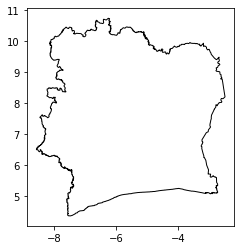

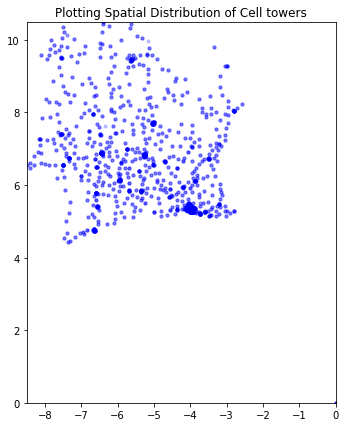

In [32]:
#Download Base map from OSM
# Load the image 

#!pip install geopandas >> Inmport libraries

import geopandas as gpd

Basemap = gpd.read_file("civ_admbnda_adm0_cntig_20180706.shp")
ax1 = Basemap.plot(edgecolor='black', facecolor='none')

fig, ax = plt.subplots(figsize = (8,7)) ## Plot the x and Y to see areas that are underserved
ax.scatter(df.LONGITUDE, df.LATITUDE, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Distribution of Cell towers')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow( Basemap, zorder=0, extent = BBox, aspect= 'equal')

In [0]:

# Combine Cell Geo with Telcom dataset with CELL ID as combine column
# Merge all telcom datasets to one

#dft1.merge(dft2.merge(dft3, on='VALUE'), on='VALUE') 
#dft12Combined =dft1.merge (dft2, on='VALUE',how ='inner')
#dft12Combined.rename (columns={'CELL_ID_x':'CELL_ID'}, inplace=True)
#dft12Combined
#dft123Combined = dft12Combined.merge (dft3, on = 'VALUE', how = 'inner') >> Crashes due to RAM Allocation
#dft123Combined 

In [0]:
#Merge Combined Telcom Dataset with Cell dataset
#df_c3
#FinalCombined= dft123Combined.merge(df_c3 , on ='Cell_ID')
#FinalCombined

#dft12Combined.drop_duplicates(subset=['CELL_ID'])
#dft12Combined
#Finalcombined = dft12Combined.merge (df_c3, on= 'CELL_ID')
#Finalcombined['PRODUCT_x']
#Finalcombined[(Finalcombined['VILLES'] == 'COCODY') & (Finalcombined['PRODUCT_x'] == 'sms')]

In [78]:
#Merge all 3  Telcom datasets
dt = [ dft1, dft2, dft3]
dtf = pd.concat(dt, axis=1)
dtf.head (5)
dtf1=dtf.dropna()
dtf1

,PRODUCT,VALUE,DATETIME,CELL_ON_SITE,DW_A_NUMBER_INT,DW_B_NUMBER_INT,COUNTRY_A,COUNTRY_B,CELL_ID,SITE_ID,PRODUCT,VALUE,DATE_TIME,CELL_ON_SITE,DW_A_NUMBER,DW_B_NUMBER,COUNTRY_A,COUNTRY_B,CELL_ID,SITE_ID,PRODUCT,VALUE,DATE_TIME,CELL_ON_SITE,DW_A_NUMBER_INT,DW_B_NUMBER_INT,COUNTRY_A,COUNTRY_B,CELL_ID,SIET_ID
0,Voice,0,2012-05-06 23:04:37.0,1,49fae048b547780,1a49f8b0ded9de6,19e2e,19e2e,/TJNe+Mmtu,/TJNe+Mmtu,sms,0,2012-05-07 23:02:06.0,2,32255675c3b6fe3,1aa7ae01386e9fb,19e2e,19e2e,+854AcBQT2,+854AcBQT2,Voice,61,2012-05-08 23:01:28.0,2,966f68353622feb,ffd53a3bb2db6f1,19e2e,19e2e,+38u2u/rfx,+38u2u/rfx
1,sms,0,2012-05-06 23:05:25.0,0,7a54a6eaee19e65,93343ba6e41af95,19e2e,19e2e,/+cKZKIp41,/+cKZKIp41,Voice,0,2012-05-07 23:03:44.0,1,ff16d6ac74c1c64,87d87309c15a8c9,19e2e,19e2e,+854AcBQT2,+854AcBQT2,sms,0,2012-05-08 23:01:31.0,1,a0a597384c612d7,cf3b218f1dde792,19e2e,19e2e,+Fs4mTvdKx,+Fs4mTvdKx
2,sms,25,2012-05-06 23:05:41.0,0,6008887b0207d82,7aacc9709ce0a20,19e2e,19e2e,/u0FSD+ahi,/u0FSD+ahi,sms,0,2012-05-07 23:04:06.0,0,98d9f2fb5ff624b,93343ba6e41af95,19e2e,19e2e,+laSrk7g6q,+laSrk7g6q,Voice,10,2012-05-08 23:02:59.0,1,5441a9a58c97132,52f8b299515b9b7,19e2e,19e2e,+ZaaZozy/+,+ZaaZozy/+
3,Voice,56,2012-05-06 23:05:42.0,1,7370032e20f4e96,6af4a60e74c91d3,19e2e,19e2e,+cNeJzsTp3,+cNeJzsTp3,Voice,37,2012-05-07 23:04:48.0,1,3f9c8a33ec7be1f,7d05a38f89c49d8,19e2e,19e2e,/xvRrCVKoQ,/xvRrCVKoQ,sms,0,2012-05-08 23:03:04.0,0,8ab8b9ed6989f61,e09e736e46c5c3d,19e2e,19e2e,+cNeJzsTp3,+cNeJzsTp3
4,Voice,14,2012-05-06 23:06:29.0,1,966ba4656e38e62,02aa736ee555d5c,19e2e,19e2e,051KhYDCpv,051KhYDCpv,sms,25,2012-05-07 23:04:58.0,1,7bcccc03adf3864,56a5d5430d2fa86,19e2e,19e2e,+bO+qkSonO,+bO+qkSonO,Voice,22,2012-05-08 23:03:16.0,4,52662a62b199334,2186273faab4602,19e2e,19e2e,/eeMklgyJA,/eeMklgyJA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,sms,0,2012-05-07 00:01:54.0,1,fb2907bd1331a92,28b9dd8f413f87b,19e2e,19e2e,5116d1c4a6,c07a544c63,sms,25,2012-05-08 00:01:53.0,0,cb5d66a782db398,51b286ade905527,19e2e,19e2e,0e8763bdaa,eefd93f0b4,Voice,10,2012-05-09 00:01:43.0,0,2f834987f0c1825,accc8e5c1164343,19e2e,OTHER,6467daa1db,8a96bae9c1
4996,sms,100,2012-05-07 00:01:54.0,0,92e367d671f45c5,38811081cf82c90,19e2e,OTHER,0c2371d9bc,1e751d08a4,sms,0,2012-05-08 00:01:53.0,8,22ffbbb8ac8cde1,8db839a0c08bd54,19e2e,19e2e,896459aace,b7d00e59e4,Voice,0,2012-05-09 00:01:43.0,3,467333ade2b4b9c,0ab2acd804d01fe,19e2e,19e2e,2aa04dcab7,f7d63a29e5
4997,Voice,1,2012-05-07 00:01:54.0,1,83b44b18238e602,6ec63d4aa5de5dd,19e2e,19e2e,5fb791cf56,65efe2bc62,sms,25,2012-05-08 00:01:53.0,0,bcf512a3542d42c,5a2848d6f983c31,19e2e,19e2e,7e90b35166,211015b14d,Voice,62,2012-05-09 00:01:43.0,1,e077a6b74c5053c,4c8098eb6ea1a41,19e2e,19e2e,7f1f2f889f,b4ddb9e93c
4998,Voice,0,2012-05-07 00:01:54.0,1,49fae048b547780,1a49f8b0ded9de6,19e2e,19e2e,7773627c12,9ef9616350,sms,0,2012-05-08 00:01:53.0,0,05e3c3d41628a9f,7185a95077eae9e,19e2e,19e2e,fe70e431df,c7ea989264,Voice,32,2012-05-09 00:01:43.0,1,77f53c39d27c050,9d064f013e2cab2,19e2e,19e2e,a4731e780e,d68260ef50


In [82]:
#Combine Telcom and Cell Geos
dtfc = [ dtf1, dfc3]
FinalCombined = pd.concat(dtfc, axis=1)
FinalCombined.head (5)


,PRODUCT,VALUE,DATETIME,CELL_ON_SITE,DW_A_NUMBER_INT,DW_B_NUMBER_INT,COUNTRY_A,COUNTRY_B,CELL_ID,SITE_ID,PRODUCT,VALUE,DATE_TIME,CELL_ON_SITE,DW_A_NUMBER,DW_B_NUMBER,COUNTRY_A,COUNTRY_B,CELL_ID,SITE_ID,PRODUCT,VALUE,DATE_TIME,CELL_ON_SITE,DW_A_NUMBER_INT,DW_B_NUMBER_INT,COUNTRY_A,COUNTRY_B,CELL_ID,SIET_ID,Unnamed: 0,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,CELL_ID,SITE_CODE
0,Voice,0.0,2012-05-06 23:04:37.0,1,49fae048b547780,1a49f8b0ded9de6,19e2e,19e2e,/TJNe+Mmtu,/TJNe+Mmtu,sms,0.0,2012-05-07 23:02:06.0,2,32255675c3b6fe3,1aa7ae01386e9fb,19e2e,19e2e,+854AcBQT2,+854AcBQT2,Voice,61.0,2012-05-08 23:01:28.0,2,966f68353622feb,ffd53a3bb2db6f1,19e2e,19e2e,+38u2u/rfx,+38u2u/rfx,0.0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,fbb2e75af3,0bb492ef17
1,sms,0.0,2012-05-06 23:05:25.0,0,7a54a6eaee19e65,93343ba6e41af95,19e2e,19e2e,/+cKZKIp41,/+cKZKIp41,Voice,0.0,2012-05-07 23:03:44.0,1,ff16d6ac74c1c64,87d87309c15a8c9,19e2e,19e2e,+854AcBQT2,+854AcBQT2,sms,0.0,2012-05-08 23:01:31.0,1,a0a597384c612d7,cf3b218f1dde792,19e2e,19e2e,+Fs4mTvdKx,+Fs4mTvdKx,1.0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,1502501d78,0bb492ef17
2,sms,25.0,2012-05-06 23:05:41.0,0,6008887b0207d82,7aacc9709ce0a20,19e2e,19e2e,/u0FSD+ahi,/u0FSD+ahi,sms,0.0,2012-05-07 23:04:06.0,0,98d9f2fb5ff624b,93343ba6e41af95,19e2e,19e2e,+laSrk7g6q,+laSrk7g6q,Voice,10.0,2012-05-08 23:02:59.0,1,5441a9a58c97132,52f8b299515b9b7,19e2e,19e2e,+ZaaZozy/+,+ZaaZozy/+,2.0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,0c2e182a0c,0bb492ef17
3,Voice,56.0,2012-05-06 23:05:42.0,1,7370032e20f4e96,6af4a60e74c91d3,19e2e,19e2e,+cNeJzsTp3,+cNeJzsTp3,Voice,37.0,2012-05-07 23:04:48.0,1,3f9c8a33ec7be1f,7d05a38f89c49d8,19e2e,19e2e,/xvRrCVKoQ,/xvRrCVKoQ,sms,0.0,2012-05-08 23:03:04.0,0,8ab8b9ed6989f61,e09e736e46c5c3d,19e2e,19e2e,+cNeJzsTp3,+cNeJzsTp3,3.0,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,69bdfc69fd,8a1e6ce31f
4,Voice,14.0,2012-05-06 23:06:29.0,1,966ba4656e38e62,02aa736ee555d5c,19e2e,19e2e,051KhYDCpv,051KhYDCpv,sms,25.0,2012-05-07 23:04:58.0,1,7bcccc03adf3864,56a5d5430d2fa86,19e2e,19e2e,+bO+qkSonO,+bO+qkSonO,Voice,22.0,2012-05-08 23:03:16.0,4,52662a62b199334,2186273faab4602,19e2e,19e2e,/eeMklgyJA,/eeMklgyJA,4.0,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,7a1029d2ab,8a1e6ce31f


In [85]:
#Select Villes and respective Date and time
VILLES = FinalCombined[['VILLES', 'DATETIME']]
VILLES


,VILLES,DATETIME
0,ADJAME,2012-05-06 23:04:37.0
1,ADJAME,2012-05-06 23:05:25.0
2,ADJAME,2012-05-06 23:05:41.0
3,ASSINIE,2012-05-06 23:05:42.0
4,ASSINIE,2012-05-06 23:06:29.0
...,...,...
4995,NaN,2012-05-07 00:01:54.0
4996,NaN,2012-05-07 00:01:54.0
4997,NaN,2012-05-07 00:01:54.0
4998,NaN,2012-05-07 00:01:54.0


In [87]:
#Most Used Cities
Products = FinalCombined[['PRODUCT', 'VILLES']]
Products


,PRODUCT,PRODUCT,PRODUCT,VILLES
0,Voice,sms,Voice,ADJAME
1,sms,Voice,sms,ADJAME
2,sms,sms,Voice,ADJAME
3,Voice,Voice,sms,ASSINIE
4,Voice,sms,Voice,ASSINIE
...,...,...,...,...
4995,sms,sms,Voice,NaN
4996,sms,sms,Voice,NaN
4997,Voice,sms,Voice,NaN
4998,Voice,sms,Voice,NaN


In [90]:
Highestvalue=FinalCombined['VALUE'].max()
Highestvalue

VALUE    1860.0
VALUE    3380.0
VALUE    6750.0
dtype: float64

In [105]:
FinalCombined.sort_values(by='VILLES', ascending=0)
#Count products available in an area and sort by value of count
FinalCombined['PRODUCT']
#FinalCombined[(FinalCombined['VILLES'] == 'COCODY') & (FinalCombined['PRODUCT'] == 'sms')]

,PRODUCT,PRODUCT,PRODUCT
0,Voice,sms,Voice
1,sms,Voice,sms
2,sms,sms,Voice
3,Voice,Voice,sms
4,Voice,sms,Voice
...,...,...,...
4995,sms,sms,Voice
4996,sms,sms,Voice
4997,Voice,sms,Voice
4998,Voice,sms,Voice
